In [1]:
import os

import numpy as np
import importlib
import gymnasium as gym
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
import matplotlib.animation as manimation

import gym_env
import utils
from models import LinearRL_NHB
from utils_render import plot_decision_prob
from utils import policy_reval, decision_policy, woodbury

In [2]:
# Set the random seed for NumPy
seed = 42
np.random.seed(42)

# Save dir
save_dir = os.path.join('..', 'figures/')

In [3]:
# For plotting
prob_locs = [1, 2]
colors = [3, 2]

# Policy Revaluation

### Construct Average DR

In [34]:
num_iterations = 400

DR_avg_with_imp = np.zeros((9, 9))
DR_avg_no_imp = np.zeros((9,9))

for i in range(num_iterations):
    # Define agents
    agent_with_imp = LinearRL_NHB(_lambda=10, alpha=0.25, beta=0.7, num_steps=250, policy="softmax", imp_samp=True, exp_type="policy_reval")
    agent_no_imp = LinearRL_NHB(_lambda=10, alpha=0.25, beta=0.7, num_steps=250, policy="softmax", imp_samp=False, exp_type="policy_reval")

    # Have the agents learn the environment
    agent_with_imp.learn()
    agent_no_imp.learn()

    # Add to the averages
    DR_avg_with_imp += agent_with_imp.DR
    DR_avg_no_imp += agent_no_imp.DR

# Take average
DR_avg_with_imp /= num_iterations
DR_avg_no_imp /= num_iterations

## With Importance Sampling

In [35]:
# Original training policy
agent_with_imp.DR = DR_avg_with_imp
agent_with_imp.update_Z()
agent_with_imp.update_V()
pii_old = decision_policy(agent_with_imp, agent_with_imp.Z)

# Policy revaluation
agent_with_imp.update_exp()
V_new, Z_new = policy_reval(agent_with_imp)
pii_new = decision_policy(agent_with_imp, Z_new)

In [36]:
print(pii_old[0])
print(pii_new[0])

[0.         0.12484069 0.87515931 0.         0.         0.
 0.         0.         0.        ]
[0.         0.64127573 0.35872427 0.         0.         0.
 0.         0.         0.        ]


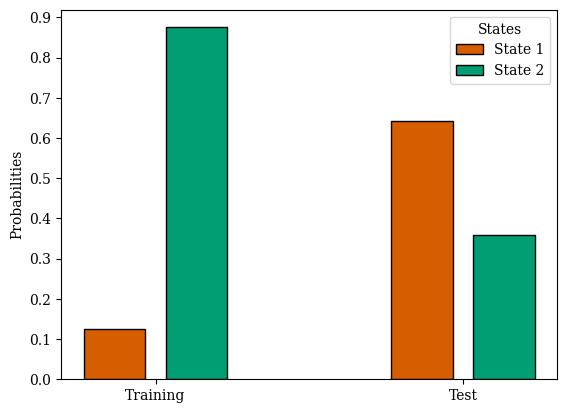

In [37]:
save_path = save_dir + 'policy_reval_nhb_with_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None, title=None)

## Without Importance Sampling

In [38]:
# Original training policy
agent_no_imp.DR = DR_avg_no_imp
agent_no_imp.update_Z()
agent_no_imp.update_V()
pii_old = decision_policy(agent_no_imp, agent_no_imp.Z)

# Policy revaluation
agent_no_imp.update_exp()
V_new, Z_new = policy_reval(agent_no_imp)
pii_new = decision_policy(agent_no_imp, Z_new)

In [39]:
print(pii_old[0])
print(pii_new[0])

[0.         0.12077806 0.87922194 0.         0.         0.
 0.         0.         0.        ]
[0.         0.38425755 0.61574245 0.         0.         0.
 0.         0.         0.        ]


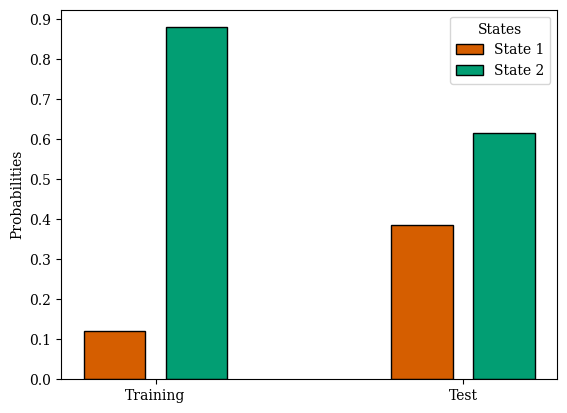

In [40]:
save_path = save_dir + 'policy_reval_nhb_without_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)

# Reward Revaluation

### Construct Average DR

In [41]:
num_iterations = 400

DR_avg_with_imp = np.zeros((9, 9))
DR_avg_no_imp = np.zeros((9,9))

for i in range(num_iterations):
    # Define agents
    agent_with_imp = LinearRL_NHB(_lambda=10, alpha=0.25, beta=0.7, num_steps=250, policy="softmax", imp_samp=True, exp_type="reward_reval")
    agent_no_imp = LinearRL_NHB(_lambda=10, alpha=0.25, beta=0.7, num_steps=250, policy="softmax", imp_samp=False, exp_type="reward_reval")

    # Have the agents learn the environment
    agent_with_imp.learn()
    agent_no_imp.learn()

    # Add to the averages
    DR_avg_with_imp += agent_with_imp.DR
    DR_avg_no_imp += agent_no_imp.DR

# Take average
DR_avg_with_imp /= num_iterations
DR_avg_no_imp /= num_iterations

## With Importance Sampling

In [42]:
# Original training policy
agent_with_imp.DR = DR_avg_with_imp
agent_with_imp.update_Z()
agent_with_imp.update_V()
pii_old = decision_policy(agent_with_imp, agent_with_imp.Z)

# Reward revaluation
agent_with_imp.update_exp()
V_new, Z_new = policy_reval(agent_with_imp)
pii_new = decision_policy(agent_with_imp, Z_new)

In [43]:
print(pii_old[0])
print(pii_new[0])

[0.        0.1479308 0.8520692 0.        0.        0.        0.
 0.        0.       ]
[0.         0.71257674 0.28742326 0.         0.         0.
 0.         0.         0.        ]


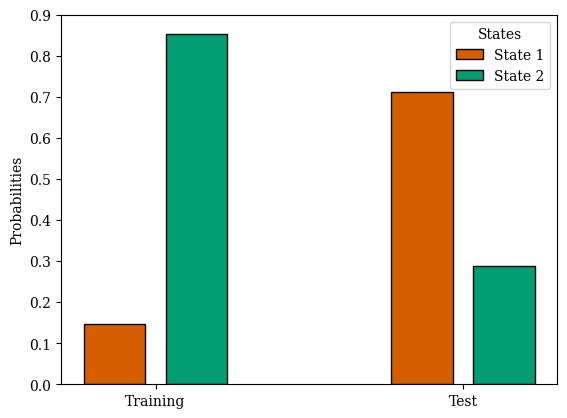

In [44]:
save_path = save_dir + 'reward_reval_nhb_with_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)

## Without Importance Sampling

In [45]:
# Original training policy
agent_no_imp.DR = DR_avg_no_imp
agent_no_imp.update_Z()
agent_no_imp.update_V()
pii_old = decision_policy(agent_no_imp, agent_no_imp.Z)

# Reward revaluation
agent_no_imp.update_exp()
V_new, Z_new = policy_reval(agent_no_imp)
pii_new = decision_policy(agent_no_imp, Z_new)

In [46]:
print(pii_old[0])
print(pii_new[0])

[0.         0.11073109 0.88926891 0.         0.         0.
 0.         0.         0.        ]
[0.         0.67927147 0.32072853 0.         0.         0.
 0.         0.         0.        ]


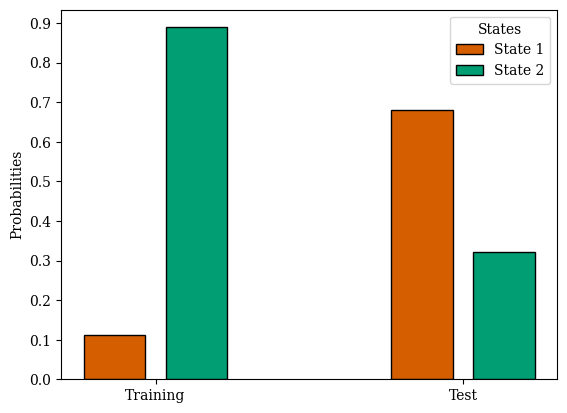

In [47]:
save_path = save_dir + 'reward_reval_nhb_without_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)

# Transition Revaluation

### Construct Average DR

In [48]:
num_iterations = 400

DR_avg_with_imp = np.zeros((9, 9))
DR_avg_no_imp = np.zeros((9,9))

for i in range(num_iterations):
    # Define agents
    agent_with_imp = LinearRL_NHB(_lambda=10, alpha=0.25, beta=0.7, num_steps=250, policy="softmax", imp_samp=True, exp_type="trans_reval")
    agent_no_imp = LinearRL_NHB(_lambda=10, alpha=0.25, beta=0.7, num_steps=250, policy="softmax", imp_samp=False, exp_type="trans_reval")

    # Have the agents learn the environment
    agent_with_imp.learn()
    agent_no_imp.learn()

    # Add to the averages
    DR_avg_with_imp += agent_with_imp.DR
    DR_avg_no_imp += agent_no_imp.DR

# Take average
DR_avg_with_imp /= num_iterations
DR_avg_no_imp /= num_iterations

## With Importance Sampling

In [49]:
# Original training task
agent_with_imp.DR = DR_avg_with_imp
agent_with_imp.update_Z()
agent_with_imp.update_V()
pii_old = decision_policy(agent_with_imp, agent_with_imp.Z)

# Transition revaluation
T_new = agent_with_imp.construct_T_new()
D_new = woodbury(agent=agent_with_imp, T=T_new, inv=False)
agent_with_imp.DR = D_new
agent_with_imp.update_Z()
agent_with_imp.update_V()
pii_new = decision_policy(agent_with_imp, agent_with_imp.Z)

In [50]:
print(pii_old[0])
print(pii_new[0])

[0.         0.15028803 0.84971197 0.         0.         0.
 0.         0.         0.        ]
[0.         0.72472613 0.27527387 0.         0.         0.
 0.         0.         0.        ]


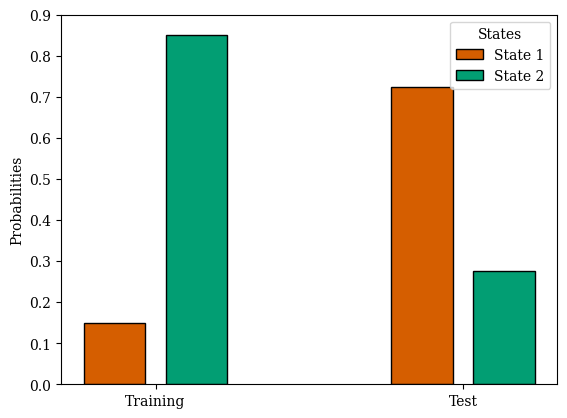

In [51]:
save_path = save_dir + 'transition_reval_nhb_with_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)

## Without Importance Sampling

In [52]:
# Original training task
agent_no_imp.DR = DR_avg_no_imp
agent_no_imp.update_Z()
agent_no_imp.update_V()
pii_old = decision_policy(agent_no_imp, agent_no_imp.Z)

# Transition revaluation
T_new = agent_no_imp.construct_T_new()
D_new = woodbury(agent=agent_no_imp, T=T_new, inv=False)
agent_no_imp.DR = D_new
agent_no_imp.update_Z()
agent_no_imp.update_V()
pii_new = decision_policy(agent_no_imp, agent_no_imp.Z)

In [53]:
print(pii_old[0])
print(pii_new[0])

[0.         0.11325611 0.88674389 0.         0.         0.
 0.         0.         0.        ]
[0.         0.48458691 0.51541309 0.         0.         0.
 0.         0.         0.        ]


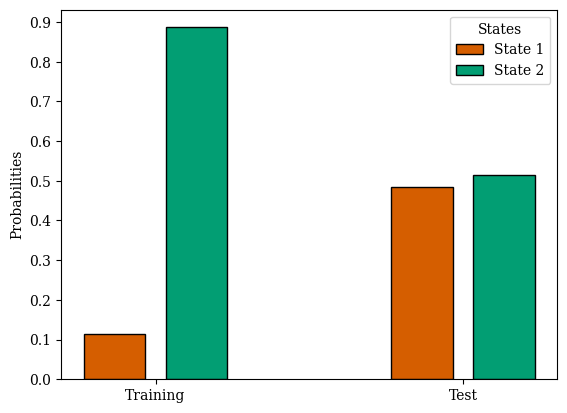

In [54]:
save_path = save_dir + 'transition_reval_nhb_without_is.png'
plot_decision_prob(probs_train=pii_old[0][prob_locs], probs_test=pii_new[0][prob_locs], colors=colors, save_path=None)